<a href="https://colab.research.google.com/github/divyanshu-mayank/6companies30days/blob/main/zerotopandas_course_project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# zerotopandas-course-project-02

Use the "Run" button to execute the code.

In [32]:
!pip install opendatasets --upgrade --quiet

In [33]:
import opendatasets as od

In [34]:
dataset_url = 'https://raw.githubusercontent.com/divyanshu-mayank/Analyst-projects/main/TATAMOTORS.NS.csv?token=GHSAT0AAAAAACNQLCYAC7LRYBH2MOECDKDGZP5JXZA'
od.download('https://raw.githubusercontent.com/divyanshu-mayank/Analyst-projects/main/TATAMOTORS.NS.csv?token=GHSAT0AAAAAACNQLCYAC7LRYBH2MOECDKDGZP5JXZA')

319488it [00:00, 3004194.11it/s]                            


In [35]:
!pip install numpy --upgrade --quiet
import numpy as np

In [36]:
!pip install pandas --upgrade --quiet

In [37]:
import pandas as pd

In [38]:
stock_data_df = pd.read_csv('TATAMOTORS.NS.csv?token=GHSAT0AAAAAACNQLCYAC7LRYBH2MOECDKDGZP5JXZA')

In [39]:
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,141.449173,10001085.0
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,148.078171,18491096.0
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,148.187225,6699838.0
3,2006-12-06,167.121048,170.167969,165.568832,168.912796,147.927109,4822862.0
4,2006-12-07,168.634933,171.701019,167.322250,171.068634,149.815109,3963218.0
...,...,...,...,...,...,...,...
4228,2024-01-15,820.000000,820.400024,810.299988,812.450012,812.450012,4835856.0
4229,2024-01-16,812.450012,827.000000,812.450012,818.849976,818.849976,10159066.0
4230,2024-01-17,811.000000,813.700012,804.000000,805.549988,805.549988,7895439.0
4231,2024-01-18,807.000000,822.950012,797.000000,819.049988,819.049988,11500495.0


In [40]:
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4233 entries, 0 to 4232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4233 non-null   object 
 1   Open       4226 non-null   float64
 2   High       4226 non-null   float64
 3   Low        4226 non-null   float64
 4   Close      4226 non-null   float64
 5   Adj Close  4226 non-null   float64
 6   Volume     4226 non-null   float64
dtypes: float64(6), object(1)
memory usage: 231.6+ KB


In [41]:
stock_data_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Column header description -
     . Date - Date of collection of Data.
     . Open - The Open Price is the first traded price on each trading day.
     . High - Today's high refers to a security's intraday highest trading price
     . Low - Today's low refers to a security's intraday lowest trading price
     . Close - The closing price is the last price at which a security traded during the regular trading day.
     . Adj Close - The adjusted closing price is attributed to anything that would affect the stock price after the market                          closes for the day.
     . Volume - Daily volume equates to how many shares are traded each day, but this can be averaged over a number of days to                   find the volume.

In [44]:
!pip install matplotlib --upgrade --quiet
import matplotlib.pyplot as plt

In [47]:
!pip install seaborn --upgrade --quiet
import seaborn as sns
%matplotlib inline

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [48]:
open_value_np = np.array(stock_data_df.Open)
open_value_np

array([173.042435, 162.023666, 170.167969, ..., 811.      , 807.      ,
       823.849976])

In [49]:
close_value_np = np.array(stock_data_df.Close)
close_value_np

array([161.515854, 169.085266, 169.209824, ..., 805.549988, 819.049988,
       823.549988])

In [50]:
date_np = np.array(stock_data_df.Date)
date_np

array(['2006-12-01', '2006-12-04', '2006-12-05', ..., '2024-01-17',
       '2024-01-18', '2024-01-19'], dtype=object)

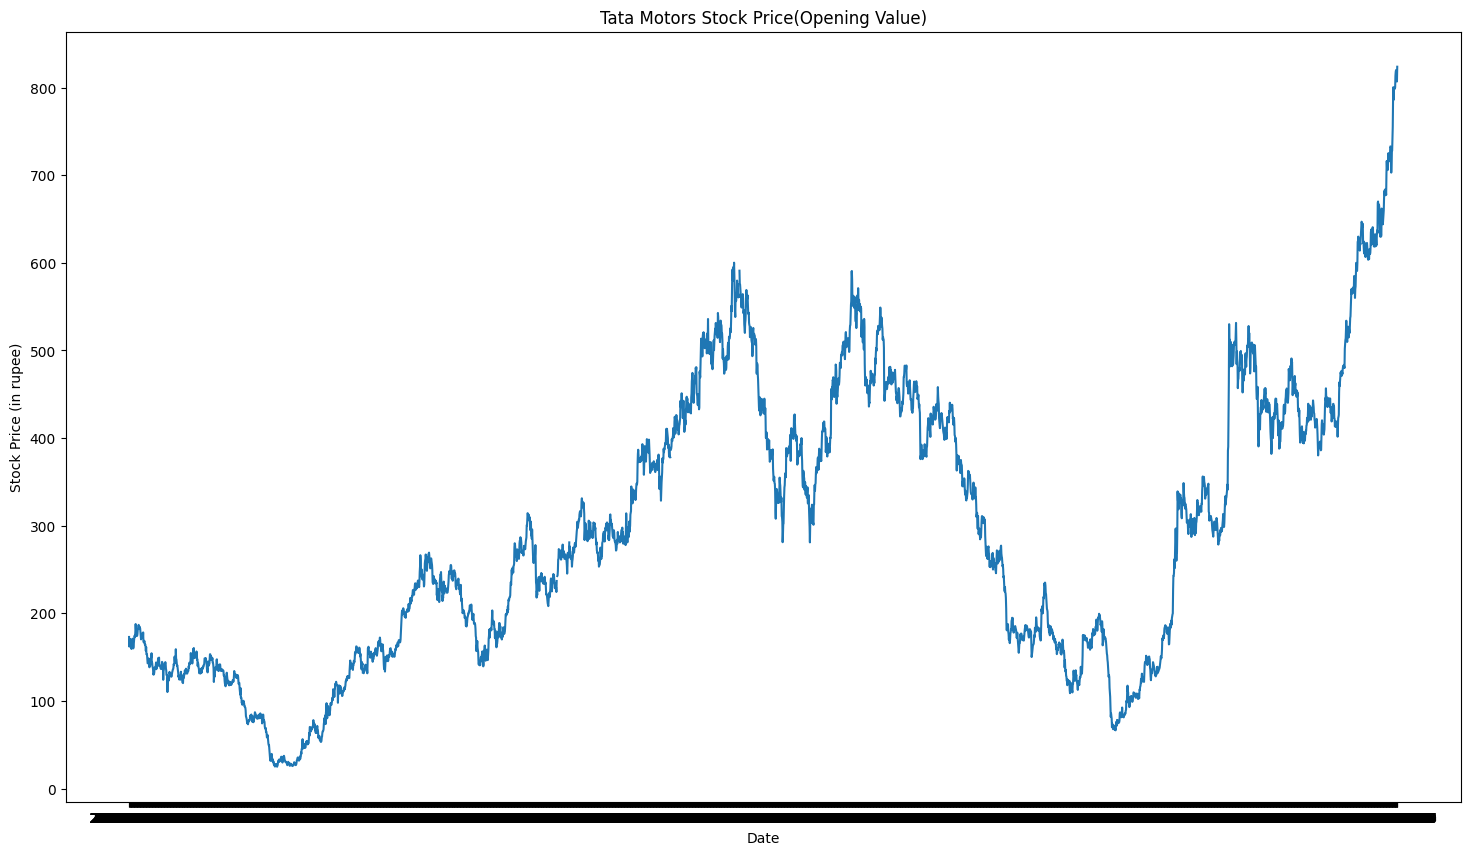

In [51]:
plt.figure(figsize=(18,10))
plt.title('Tata Motors Stock Price(Opening Value)')

plt.plot(stock_data_df.Date, stock_data_df.Open);

plt.xlabel('Date')
plt.ylabel('Stock Price (in rupee)');

Over some period the share values fall or rise immensely. Let us locate these time events.
For the same purpose, we will convert the date from object type to datetimens type.

Additionally, we can refer to the following webpage to locate the steep drop event in Tata Motors stock price(
https://fincopanda.com/tata-motors-share-price-history/)

In [52]:
stock_data_df['Date'] = pd.to_datetime(stock_data_df.Date)


In [53]:
stock_data_df['year'] = pd.DatetimeIndex(stock_data_df.Date).year
stock_data_df['month'] = pd.DatetimeIndex(stock_data_df.Date).month
stock_data_df['day'] = pd.DatetimeIndex(stock_data_df.Date).day

In [54]:
# Recording the opening and closing stock price at the beginning and ending of a every year
yearly_data = stock_data_df.groupby(stock_data_df.year)[['Open', 'Close']].agg({
    'Open': lambda x: x.iloc[0],
    'Close': lambda x: x.iloc[-1]
})

# Print the DataFrame
print(yearly_data)

            Open       Close
year                        
2006  173.042435  172.582520
2007  172.869965  142.170746
2008  142.189911   31.630728
2009   34.430695  156.629990
2010  156.303482  258.893097
2011  262.722046  176.803604
2012  179.029724  309.332092
2013  312.646545  372.405579
2014  373.543365  490.291138
2015  489.252289  391.299988
2016  392.500000  472.000000
2017  472.000000  431.850006
2018  430.950012  172.699997
2019  173.500000  185.149994
2020  185.149994  183.850006
2021  184.949997  482.399994
2022  493.500000  387.950012
2023  392.500000  779.950012
2024  785.000000  823.549988


Querying for different years and finding out the months and years that recorded high fall in stock prices.

In [55]:
from IPython.display import display
with pd.option_context('display.max_rows', 1000):
    display(stock_data_df[stock_data_df.year == 2008])

from IPython.display import display
with pd.option_context('display.max_rows', 1000):
    display(stock_data_df[stock_data_df.year == 2009])

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
268,2008-01-01,142.189911,146.884857,141.231750,146.089584,130.530350,6914777.0,2008,1,1
269,2008-01-02,146.951920,152.729584,144.297836,152.068466,135.872467,10611582.0,2008,1,2
270,2008-01-03,153.304474,156.370575,149.481445,151.694778,135.538589,10581493.0,2008,1,3
271,2008-01-04,153.304474,157.922775,147.775940,149.788055,133.834930,9271718.0,2008,1,4
272,2008-01-07,150.046753,154.799194,146.214142,150.506668,134.477005,7606509.0,2008,1,7
273,2008-01-08,151.388168,153.208664,146.674057,148.494553,132.679184,7345470.0,2008,1,8
274,2008-01-09,146.980667,150.813278,144.489471,147.593887,131.874466,6054977.0,2008,1,9
275,2008-01-10,150.046753,153.687744,142.592331,143.569641,128.278793,17651909.0,2008,1,10
276,2008-01-11,149.462280,149.462280,141.068863,146.233307,130.658783,6703412.0,2008,1,11
277,2008-01-14,146.578247,149.376053,145.428467,146.712387,131.086838,5100792.0,2008,1,14


,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
514,2009-01-02,34.430695,36.092869,33.757912,34.836346,32.057747,18566132.0,2009,1,2
515,2009-01-05,36.607349,36.607349,34.638466,35.311253,32.494781,13382037.0,2009,1,5
516,2009-01-06,35.608067,37.388966,34.737408,36.894272,33.951538,18622646.0,2009,1,6
517,2009-01-07,37.398857,37.398857,33.451202,34.460377,31.711769,8271220.0,2009,1,7
518,2009-01-09,35.617962,35.617962,31.106354,32.798206,30.182177,11836652.0,2009,1,9
519,2009-01-12,33.025764,33.213749,30.938156,31.957226,29.408276,10096591.0,2009,1,12
520,2009-01-13,31.957226,32.056164,30.116964,30.690809,28.242868,7339098.0,2009,1,13
521,2009-01-14,31.264654,31.561472,30.275267,30.938156,28.470488,8309400.0,2009,1,14
522,2009-01-15,30.255480,30.572083,28.692245,29.810255,27.432550,11152057.0,2009,1,15
523,2009-01-16,30.651234,30.651234,29.602484,30.265373,27.851366,7452421.0,2009,1,16


This drop in Tata Motors stock price was due to the great recession and break in supply and demand chain.
Here are some article for reference -
https://economictimes.indiatimes.com/markets/stocks/news/tata-motors-down-2-6-as-nov-sales-fall-30/articleshow/3783055.cms?from=mdr
https://economictimes.indiatimes.com/tata-motors-dec-sales-down-by-47/articleshow/3926712.cms?from=mdr


In [56]:
stock_data_2018_df = stock_data_df[stock_data_df.year == 2018]
with pd.option_context('display.max_rows',1000):
    display(stock_data_2018_df)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
2737,2018-01-01,430.950012,436.399994,422.250000,424.450012,423.131256,6807536.0,2018,1,1
2738,2018-01-02,428.850006,440.850006,422.000000,439.299988,437.935089,15331261.0,2018,1,2
2739,2018-01-03,440.399994,441.399994,431.950012,433.899994,432.551849,9794953.0,2018,1,3
2740,2018-01-04,430.000000,433.299988,425.750000,429.950012,428.614166,8395377.0,2018,1,4
2741,2018-01-05,431.250000,436.350006,429.799988,431.600006,430.259033,7021611.0,2018,1,5
2742,2018-01-08,432.000000,436.200012,431.649994,433.549988,432.202942,4635214.0,2018,1,8
2743,2018-01-09,434.250000,443.500000,433.000000,437.549988,436.190521,12629045.0,2018,1,9
2744,2018-01-10,438.000000,439.299988,431.299988,433.299988,431.953705,4702579.0,2018,1,10
2745,2018-01-11,433.500000,437.600006,432.899994,434.750000,433.399231,4564895.0,2018,1,11
2746,2018-01-12,437.000000,441.450012,432.100006,437.100006,435.741943,7408870.0,2018,1,12


### Refer to the following news article for 2018 stock price drop -
https://www.businesstoday.in/markets/company-stock/story/tata-motors-falls-should-you-buy-the-stock-jaguar-land-rover-119023-2018-12-06

In [57]:
stock_data_2021_df = stock_data_df[stock_data_df.year == 2021]
with pd.option_context('display.max_rows',1000):
    display(stock_data_2021_df)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
3477,2021-01-01,184.949997,187.000000,184.500000,186.500000,185.920547,27334421.0,2021,1,1
3478,2021-01-04,191.800003,193.000000,188.750000,191.300003,190.705627,63980597.0,2021,1,4
3479,2021-01-05,187.100006,193.899994,185.050003,193.199997,192.599716,75752593.0,2021,1,5
3480,2021-01-06,194.449997,197.600006,190.649994,195.399994,194.792877,75621947.0,2021,1,6
3481,2021-01-07,197.000000,200.350006,195.100006,196.750000,196.138702,66024848.0,2021,1,7
3482,2021-01-08,198.750000,201.500000,197.100006,198.149994,197.534332,53991568.0,2021,1,8
3483,2021-01-11,199.899994,225.399994,199.649994,220.649994,219.964432,182483100.0,2021,1,11
3484,2021-01-12,227.000000,252.399994,224.100006,237.800003,237.061157,390577839.0,2021,1,12
3485,2021-01-13,242.899994,248.800003,238.399994,242.600006,241.846252,164649387.0,2021,1,13
3486,2021-01-14,242.850006,249.800003,238.600006,245.100006,244.338470,86819519.0,2021,1,14


### Articles on 2021 Tata stock price surge -
https://www.equitymaster.com/detail.asp?date=10/13/2021&story=6&title=Massive-Surge-in-the-Shares-of-Tata-Motors-Today-Key-Factors-Favouring-the-Rally
https://economictimes.indiatimes.com/markets/stocks/news/three-factors-that-will-drive-tata-motors-after-nearly-180-rally-in-2021/articleshow/87905566.cms?from=mdr

Tata Motors stock prices surged despite the Covid-19 crisis because of investors' trust in Tata Motors building the EV market in India much alike US based Tesla.

In [58]:
stock_data_2023_df = stock_data_df[stock_data_df.year == 2023]
with pd.option_context('display.max_rows',1000):
    display(stock_data_2023_df)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
3973,2023-01-02,392.500000,396.000000,391.000000,394.799988,393.573334,10501357.0,2023,1,2
3974,2023-01-03,396.000000,398.350006,393.000000,393.899994,392.676147,9431220.0,2023,1,3
3975,2023-01-04,394.799988,394.799988,385.000000,385.600006,384.401947,16121049.0,2023,1,4
3976,2023-01-05,387.899994,388.750000,382.500000,386.899994,385.697906,10443908.0,2023,1,5
3977,2023-01-06,386.100006,388.399994,381.000000,382.000000,380.813110,8715469.0,2023,1,6
3978,2023-01-09,386.350006,392.700012,385.000000,389.450012,388.239990,14693099.0,2023,1,9
3979,2023-01-10,400.000000,417.750000,400.000000,412.899994,411.617096,54021379.0,2023,1,10
3980,2023-01-11,415.750000,420.000000,413.549988,418.200012,416.900665,22224361.0,2023,1,11
3981,2023-01-12,420.299988,420.500000,410.049988,412.250000,410.969147,12479034.0,2023,1,12
3982,2023-01-13,413.000000,416.350006,408.000000,411.500000,410.221466,10449630.0,2023,1,13


### 2023 stock price surge backstory
https://economictimes.indiatimes.com/markets/stocks/news/tata-motors-shares-jump-6-to-double-money-in-2023-whats-fueling-the-rally/articleshow/106370682.cms?from=mdr



# Studying Volume variation over years

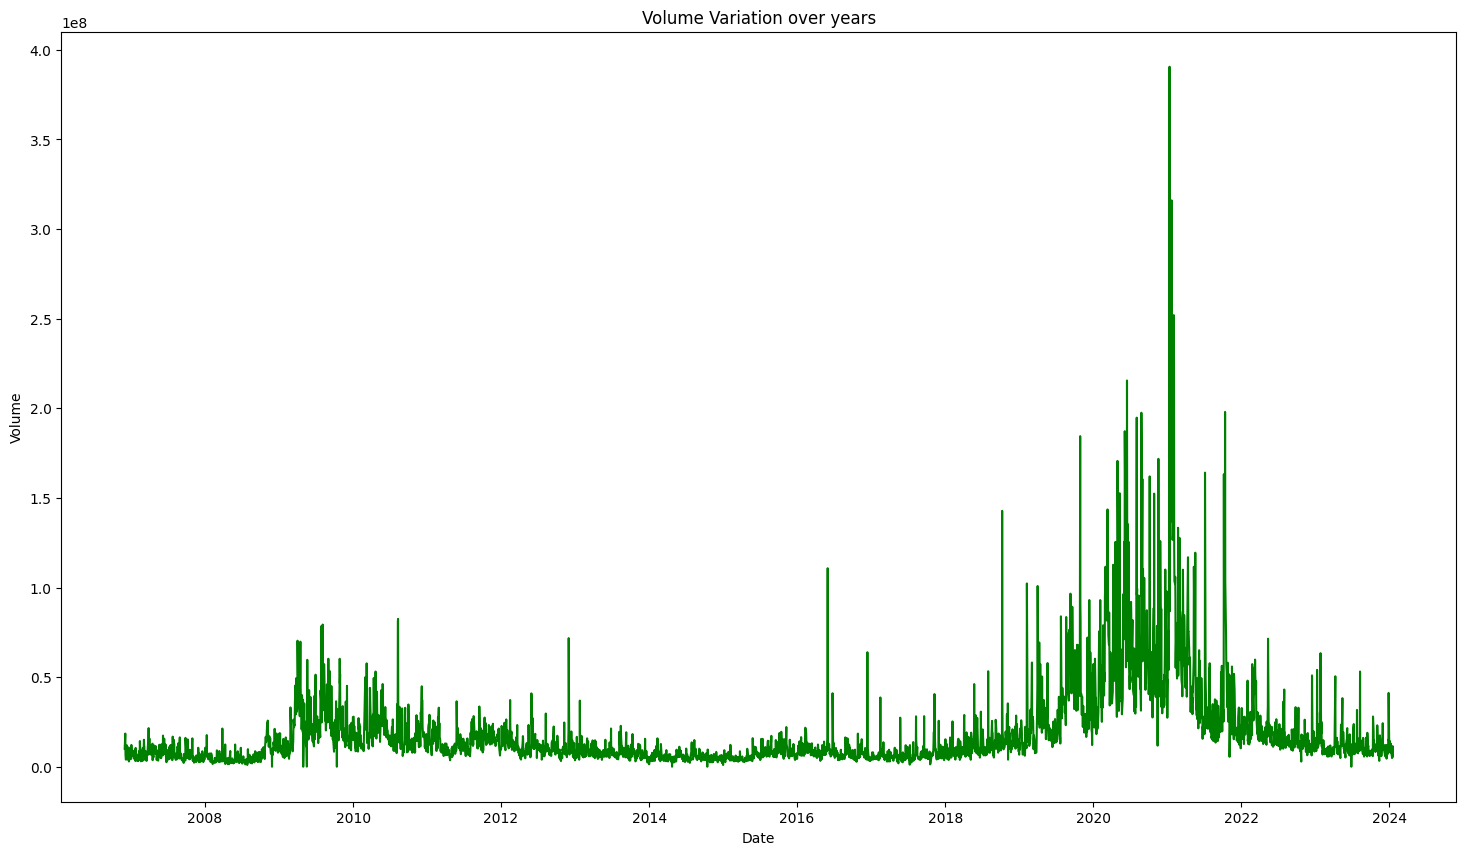

In [59]:
plt.figure(figsize=(18,10))
plt.title('Volume Variation over years')

plt.plot(stock_data_df.Date, stock_data_df.Volume,c='g')
plt.xlabel('Date')
plt.ylabel('Volume');

### Why are there spikes in the graphs (probably representing a very sudden change in the stock volume)

A company's outstanding stock volume may change due to a number of reasons, including:
Stock issuances or buybacks
Stock splits or reverse stock splits
Selling more shares to the public
Employees redeeming stock options
Raising capital through equity financing
Exercising employee stock options (ESOs) or other financial instruments
Changes in the number of issued shares
Changes in treasury shares

#### Let us locate the peak events of outstanding stock volume

In [60]:
stock_data_df.sort_values('Volume', ascending = False).head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
3484,2021-01-12,227.000000,252.399994,224.100006,237.800003,237.061157,390577839.0,2021,1,12
3492,2021-01-22,295.950012,306.899994,278.350006,289.350006,288.450989,316008609.0,2021,1,22
3491,2021-01-21,281.000000,299.000000,280.000000,290.600006,289.697113,283614463.0,2021,1,21
3498,2021-02-02,293.600006,328.850006,290.399994,322.000000,320.999542,251965965.0,2021,2,2
3487,2021-01-15,246.000000,264.649994,242.600006,260.299988,259.491241,250038029.0,2021,1,15
3499,2021-02-03,339.200012,341.899994,326.200012,331.000000,329.971588,224190114.0,2021,2,3
3337,2020-06-16,102.000000,103.500000,92.000000,94.750000,94.455612,215476711.0,2020,6,16
3490,2021-01-20,260.000000,277.500000,258.850006,274.899994,274.045868,205145151.0,2021,1,20
3670,2021-10-13,462.899994,523.849976,462.899994,506.899994,505.325043,197949387.0,2021,10,13
3388,2020-08-26,130.500000,139.000000,128.350006,137.899994,137.471542,197510376.0,2020,8,26


### The peak volume surge was in January 2021. Probable reason for the same could be
Tata Motors drew investments from the market for EV market enlargement in India.

# Studying the stock price variation during Financial budget sessions in India

In [61]:
import jovian

ModuleNotFoundError: No module named 'jovian'

In [62]:
jovian.commit()

NameError: name 'jovian' is not defined